In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('new-site.csv', sep='\t')

In [6]:
df.head()

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38


In [7]:
# разделение на группы
data_0 = df[df['site'] == 0]
data_1 = df[df['site'] == 1]

In [9]:
data_0['dwell-time'].sum()

16898

In [10]:
data_1['dwell-time'].sum()

10032

In [11]:
data_0['dwell-time'].mean()

90.84946236559139

In [12]:
data_1['dwell-time'].mean()

88.0

In [14]:
data_1['dwell-time'].count()

114

In [ ]:
# чтение файла
df = pd.read_csv('data/new-site.csv', sep='\t')

# разделение на группы
data_0 = df[df['site'] == 0]
data_1 = df[df['site'] == 1]

# гипотезы и уровень значимости 
H0 = 'Нет значимой разницы между средним временем проведения на сайте в группах'
Ha = 'Есть значимая разница между средним временем проведения на сайте в группах'
alpha = 0.05

# Критерий Уилкоксона
test_results = wilcoxon(df[df['site'] == 0]['dwell-time'], df[df['site'] == 1]['dwell-time'])

p = round(test_results[1],3)

if p>alpha:
    print(f"{p} > {alpha}. \nМы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. \nМы отвергаем нулевую гипотезу. {Ha}")

In [4]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [5]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [7]:
daily_data['conversion']=daily_data['converted']/daily_data['users_count']*100
daily_data.head(10)

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


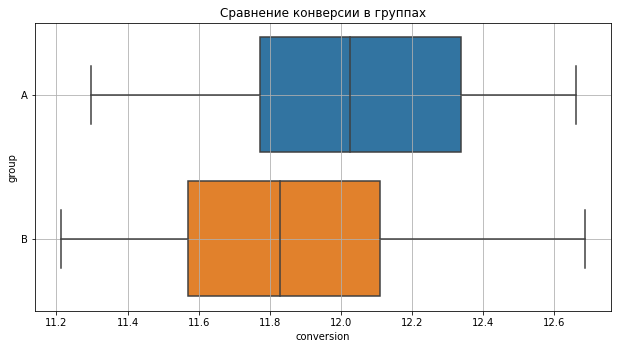

In [8]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [9]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


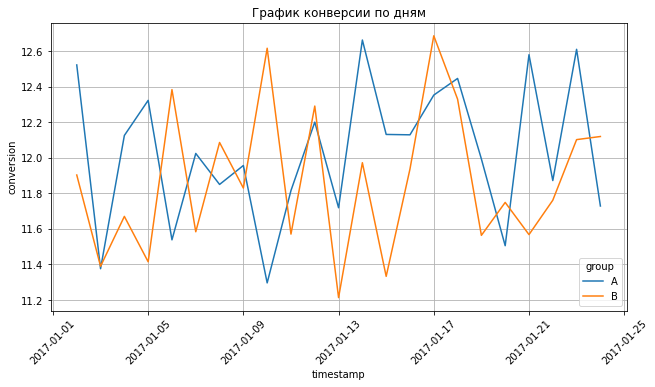

In [10]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [11]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

/var/folders/t6/jc5fqrkn0gv95ps21cwdcp340000gn/T/ipykernel_37008/906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [12]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


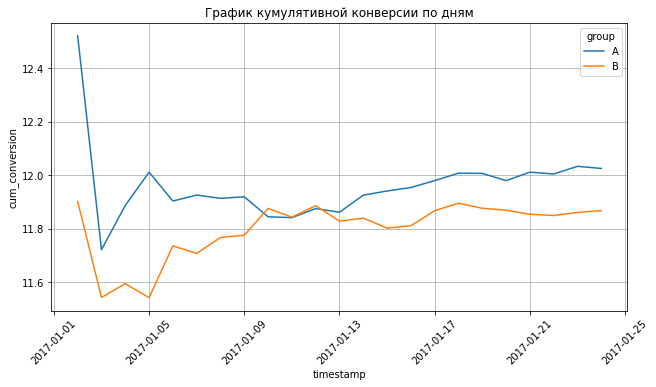

In [13]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [20]:
sample_a = pd.read_csv('ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('ab_test-redesign_sample_b.csv')

In [21]:
sample_b.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [24]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_a['transactions'].value_counts()

0    61164
1      378
2       25
3        3
4        1
Name: transactions, dtype: int64

In [29]:
sample_a_summ = sample_a.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
sample_a_summ.head()

,date,group,users_count,transactions,revenue
0,2020-11-06,A,2576,16,1577279
1,2020-11-07,A,2704,23,1721886
2,2020-11-08,A,3354,25,846051
3,2020-11-09,A,3234,18,708830
4,2020-11-10,A,3022,29,826984


In [25]:
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')
sample_b['transactions'].value_counts()

0    60953
1      401
2       25
3        4
Name: transactions, dtype: int64

In [30]:
sample_b_summ = sample_b.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
sample_b_summ.head()

,date,group,users_count,transactions,revenue
0,2020-11-06,B,2499,19,996645
1,2020-11-07,B,2804,19,555499
2,2020-11-08,B,3291,24,3044842
3,2020-11-09,B,3062,25,1285836
4,2020-11-10,B,3072,30,2414726


In [34]:
# вычисляем кумулятивную сумму количества посетителей
sample_a_summ['cum_users_count'] = sample_a_summ.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
sample_a_summ['cum_transactions'] = sample_a_summ.groupby(['group'])['transactions'].cumsum()
# вычисляем кумулятивную конверсию
sample_a_summ['cum_revenue'] =sample_a_summ.groupby(['group'])['revenue'].cumsum()
sample_a_summ['cum_conversion'] = sample_a_summ['cum_transactions']/sample_a_summ['cum_users_count'] * 100
sample_a_summ['cum_bill'] = sample_a_summ['cum_revenue']/sample_a_summ['cum_transactions']
display(sample_a_summ.head())

,date,group,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,cum_bill
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2,2020-11-08,A,3354,25,846051,8634,64,4145216,0.741256,64769.000000
3,2020-11-09,A,3234,18,708830,11868,82,4854046,0.690934,59195.682927
4,2020-11-10,A,3022,29,826984,14890,111,5681030,0.745467,51180.450450


In [35]:
# вычисляем кумулятивную сумму количества посетителей
sample_b_summ['cum_users_count'] = sample_b_summ.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
sample_b_summ['cum_transactions'] = sample_b_summ.groupby(['group'])['transactions'].cumsum()
# вычисляем кумулятивную конверсию
sample_b_summ['cum_revenue'] =sample_b_summ.groupby(['group'])['revenue'].cumsum()
sample_b_summ['cum_conversion'] = sample_b_summ['cum_transactions']/sample_b_summ['cum_users_count'] * 100
sample_b_summ['cum_bill'] = sample_b_summ['cum_revenue']/sample_b_summ['cum_transactions']
display(sample_b_summ.head())

,date,group,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,cum_bill
0,2020-11-06,B,2499,19,996645,2499,19,996645,0.760304,52455.000000
1,2020-11-07,B,2804,19,555499,5303,38,1552144,0.716576,40845.894737
2,2020-11-08,B,3291,24,3044842,8594,62,4596986,0.721434,74144.935484
3,2020-11-09,B,3062,25,1285836,11656,87,5882822,0.746397,67618.643678
4,2020-11-10,B,3072,30,2414726,14728,117,8297548,0.794405,70919.213675


In [37]:
sample_a_summ['cum_conversion'].mean()

0.7127554606160045

In [38]:
sample_b_summ['cum_conversion'].mean()

0.7621783890588011

In [40]:
samples = pd.merge(sample_a_summ,
             sample_b_summ,
             how='outer',
             on='date')

In [44]:
samples.head()


,date,group_x,users_count_x,transactions_x,revenue_x,cum_users_count_x,cum_transactions_x,cum_revenue_x,cum_conversion_x,cum_bill_x,group_y,users_count_y,transactions_y,revenue_y,cum_users_count_y,cum_transactions_y,cum_revenue_y,cum_conversion_y,cum_bill_y
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.621118,98579.937500,B,2499,19,996645,2499,19,996645,0.760304,52455.000000
1,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.738636,84593.974359,B,2804,19,555499,5303,38,1552144,0.716576,40845.894737
2,2020-11-08,A,3354,25,846051,8634,64,4145216,0.741256,64769.000000,B,3291,24,3044842,8594,62,4596986,0.721434,74144.935484
3,2020-11-09,A,3234,18,708830,11868,82,4854046,0.690934,59195.682927,B,3062,25,1285836,11656,87,5882822,0.746397,67618.643678
4,2020-11-10,A,3022,29,826984,14890,111,5681030,0.745467,51180.450450,B,3072,30,2414726,14728,117,8297548,0.794405,70919.213675


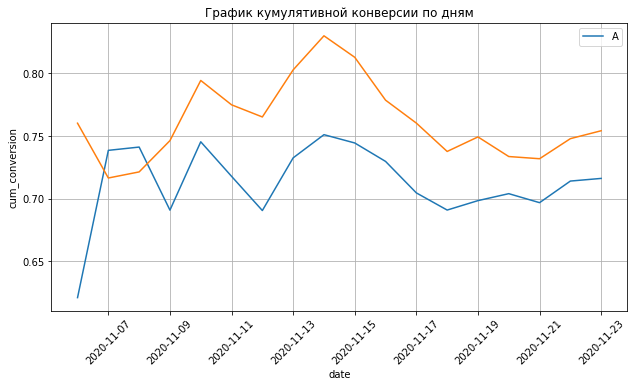

In [48]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=sample_a_summ, hue='group', ax=ax)
sns.lineplot(x='date', y='cum_conversion', data=sample_b_summ, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

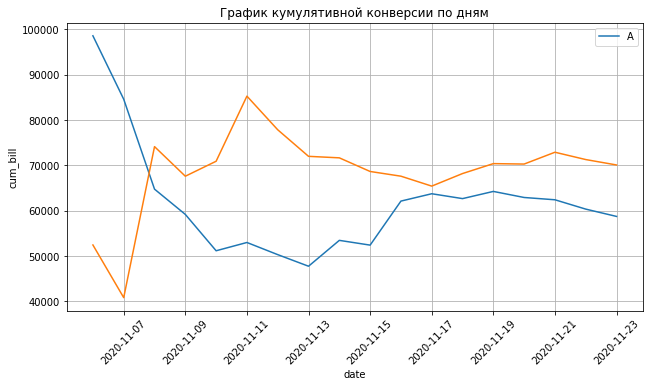

In [49]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_bill', data=sample_a_summ, hue='group', ax=ax)
sns.lineplot(x='date', y='cum_bill', data=sample_b_summ, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [53]:
from statsmodels.stats.proportion import proportions_ztest
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.1 #уровень значимости
#вычисляем результат z-теста для пропорций
results = proportions_ztest(
    sample_a['cum_conversion'],
    sample_b['cum_conversion']
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

NotImplementedError: more than two samples are not implemented yet

: 